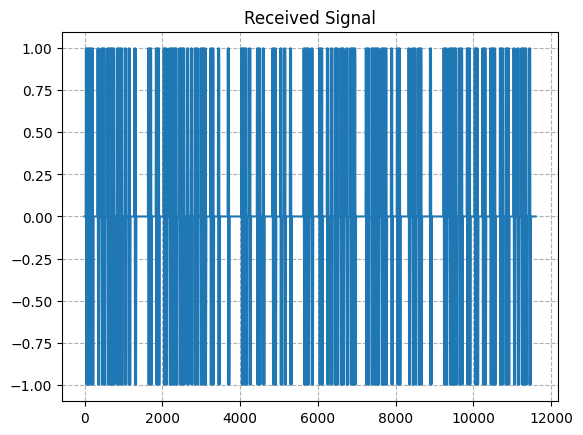

In [5]:
import numpy as np
import matplotlib.pyplot as plt

samp_rate = 100 # 100 samples/s
bitrate =  2 # 2 bits/s

# Importing the signal file
# ask_mod = np.fromfile("ask_waveform_1-1.dat")
ask_mod = np.fromfile("ask_waveform_2.dat")

plt.plot(ask_mod)
# plt.plot(ask_mod2)
plt.title("Received Signal")
plt.grid(True, linestyle='--')

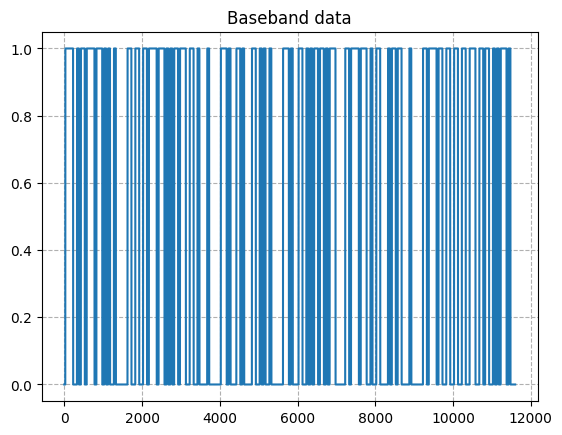

In [6]:
'''
This step is crucial to extract the information signal from the carrier.
Since we used OOK during modulation, here we're gonna take 1 for any non-zero amplitude
and 0 for a zero amplitude sample. This creates our baseband.
'''
bb_data = [1 if i!=0 else 0 for i in ask_mod]

plt.plot(bb_data)
plt.title("Baseband data")
plt.grid(True, linestyle='--')

In [8]:
# Calc samples/bit to get the message in bytes.
samp_per_bit = samp_rate/bitrate
inp = []

'''
Since each message bit is spread across samp_per_bit bytes, we loop over the baseband
and take every samp_per_bit'th sample.
'''
for i in range(1, len(bb_data), int(samp_per_bit)):
    #inp += str(bb_data[i-1])
    inp.append(bb_data[i-1])

# Converting to string
result = ''.join(str(i) for i in inp)
print(result)

0111100101101111011101010010000001100110011011110111010101101110011001000010000001110100011010000110010100100000011101000110010101101101011100000110111101110010011000010110110000100000011011110110011001100110011100110110010101110100


In [50]:
byte_chunks = [result[i:i+8] for i in range(0, len(result), 8)]

# Convert each 8-bit chunk to decimal and then to ASCII
ascii_result = ''.join([chr(int(chunk, 2)) for chunk in byte_chunks])

print("Original ASCII Message:", ascii_result)

Original ASCII Message: you found the temporal offset
